In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive')
!pwd

/content/drive/My Drive


In [ ]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
import pandas as pd
import numpy as np
from tqdm import trange


from skimage.io import imread
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from keras import regularizers
import keras
from keras import optimizers
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate
from keras.layers.advanced_activations import ReLU
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
import random
import math
import matplotlib.image as mpimg
import cv2
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras import callbacks
from keras import layers, models

from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50

from google.colab.patches import cv2_imshow

In [ ]:
IMG_WIDTH=256
IMG_HEIGHT=256

In [ ]:
def create_dataset(path):
  img_data_array = []

  for i in trange(1, 4126):
            
        path2 = "img"+ str(i) +".jpg"
        path1 = os.path.join(path, path2)
        # print(path1)
        image= cv2.imread(path1, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (224, 224),interpolation = cv2.INTER_AREA)
        # cv2_imshow(image)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255 
        img_data_array.append(image)
      
        # print(image)

  return img_data_array


# extract the image array and class name
img_data=create_dataset('10psi-images')     #check if the images are mapped correctly to labels


100%|██████████| 4125/4125 [00:43<00:00, 95.00it/s]


In [ ]:
train_data = np.asarray(img_data)
train_data.shape

(4125, 224, 224, 3)

In [ ]:
y_train = pd.read_csv('10psi-labels-all.csv')

In [ ]:
num_classes = 5

In [ ]:
train_data.shape
# target_data.shape

(4125, 224, 224, 3)

In [ ]:
# train_data = train_data.astype('float32')
# train_data = train_data/255

# rgb_batch = np.repeat(train_data[..., np.newaxis], 3, -1)
# rgb_batch.shape

# target_data = target_data.astype('float32')
# target_data = target_data/255

# rgb_target = np.repeat(target_data[..., np.newaxis], 3, -1)
# rgb_target.shape

In [ ]:
# target_data = rgb_target

In [ ]:
# target_data.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data, y_train, test_size = 0.3, random_state=600, shuffle=True)

In [ ]:
print(y_train)

       B   R  Theta   X   Y
2317  18  10    -20  16  18
443   22  12    -10  16  16
692   20  10     10  16  16
2739  30   4     20  16  18
2649  22  24     20  16  18
...   ..  ..    ...  ..  ..
410   20  -4    -10  16  16
2506  12 -12     20  16  18
3375  16 -24     10  18  16
954   20 -16    -20  16  16
3275  30 -24    -10  18  16

[2887 rows x 5 columns]


In [ ]:
input_shape = (224, 224, 3)

In [ ]:
target_scaler = MinMaxScaler()
target_scaler.fit(y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
y_train = target_scaler.transform(y_train)
y_test = target_scaler.transform(y_test)

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# y_train_trans = StandardScaler().fit_transform(y_test)

In [ ]:
# print(y_train_trans)

In [ ]:
# print(y_train.iloc[:,0])

In [ ]:
# maxr = y_train.iloc[:,0].max()       #finding the min and max of r, x, y columns in the train data
# minr = y_train.iloc[:,0].min()
# maxx = y_train.iloc[:,1].max()
# minx = y_train.iloc[:,1].min()
# maxy = y_train.iloc[:,2].max()
# miny = y_train.iloc[:,2].min()

In [ ]:
# print(maxr, minr, maxx, minx, maxy, miny)

In [ ]:
# y_train_scaled = y_train      #creating another variable y_train_scaled where i copy y_train
# y_train_scaled

In [ ]:
# len(y_train_scaled.iloc[:,0])

In [ ]:
# for i in range(len(y_train_scaled.iloc[:,0])):      #scaling r
#   # print(i)
#   y_train_scaled.iloc[i,0] = (2 *(y_train_scaled.iloc[i,0] - minr)/(maxr-minr)) - 1   #

# for i in range(len(y_train_scaled.iloc[:,1])):    #scaling x
#   # print(i)
#   y_train_scaled.iloc[i,1] = (2 *(y_train_scaled.iloc[i,1] - minx)/(maxx-minx)) - 1

# for i in range(len(y_train_scaled.iloc[:,2])):    #scaling y
#   # print(i)
#   y_train_scaled.iloc[i,2] = (2 *(y_train_scaled.iloc[i,2] - miny)/(maxy-miny)) - 1   #

In [ ]:
# y_train

In [ ]:
# maxtr = y_test.iloc[:,0].max()    #finding the min and max of r, x, y columns in the test data
# mintr = y_test.iloc[:,0].min()
# maxtx = y_test.iloc[:,1].max()
# mintx = y_test.iloc[:,1].min()
# maxty = y_test.iloc[:,2].max()
# minty = y_test.iloc[:,2].min()

In [ ]:
# print(maxtr, mintr, maxtx, mintx, maxty, minty)

In [ ]:
# y_test_scaled = y_test
# y_test_scaled

In [ ]:
# for i in range(len(y_test_scaled.iloc[:,0])):     #scaling r
#   # print(i)
#   y_test_scaled.iloc[i,0] = (2 *(y_test_scaled.iloc[i,0] - mintr)/(maxtr-mintr)) - 1   #

# for i in range(len(y_test_scaled.iloc[:,1])):   #scaling x
#   # print(i)
#   y_test_scaled.iloc[i,1] = (2 *(y_test_scaled.iloc[i,1] - mintx)/(maxtx-mintx)) - 1 

# for i in range(len(y_test_scaled.iloc[:,2])):   #scaling y
#   # print(i)
#   y_test_scaled.iloc[i,2] = (2 *(y_test_scaled.iloc[i,2] - minty)/(maxty-minty)) - 1  

In [ ]:
# print(y_test_scaled)

In [ ]:
# print(y_train_scaled)

In [ ]:
# vgg = VGG16()

In [ ]:
new_input = Input(shape=(224, 224, 3))
vgg_model = VGG16(include_top=False, weights='imagenet', input_tensor=new_input)

for layer in vgg_model.layers[:14]:
  layer.trainable = False

for layer in vgg_model.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7f906038c890> False
<keras.layers.convolutional.Conv2D object at 0x7f9060380350> False
<keras.layers.convolutional.Conv2D object at 0x7f905fa49050> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9051ab2450> False
<keras.layers.convolutional.Conv2D object at 0x7f9051abd1d0> False
<keras.layers.convolutional.Conv2D object at 0x7f90603c6dd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9051abd790> False
<keras.layers.convolutional.Conv2D object at 0x7f9050048e10> False
<keras.layers.convolutional.Conv2D object at 0x7f90500503d0> False
<keras.layers.convolutional.Conv2D object at 0x7f9050055c10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f90500487d0> False
<keras.layers.convolutional.Conv2D object at 0x7f905005e690> False
<keras.layers.convolutional.Conv2D object at 0x7f9050066310> False
<keras.layers.convolutional.Conv2D object at 0x7f905005e510> False
<keras.layers.pooling.MaxPooling2D object at 0x7f905006d7d0>

In [ ]:
def create_model():
  model = Sequential()
  model.add(vgg_model)
  model.add(layers.Flatten())
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.0005)))
  model.add(layers.Dropout(0.4))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(5, activation='sigmoid', kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.0005)))
  model.add(layers.Dropout(0.4))
  model.compile(optimizer= Adam(0.0003),#"adam",
              loss='mean_squared_error',
              metrics=['mse'])
  return model


In [ ]:
# def create_model():
#   model = Sequential()
#   model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))#
#   # model.add(layers.MaxPooling2D((2, 2), strides = 2))
#   model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#   model.add(layers.MaxPooling2D((2, 2), strides = 2))
#   # model.add(layers.Dropout(0.25))
#   model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#   # model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#   model.add(layers.MaxPooling2D((2, 2)))
#   # model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#   # model.add(layers.MaxPooling2D((2, 2)))
#   # model.add(layers.Dropout(0.25))
#   model.add(layers.Flatten())
#   model.add(layers.BatchNormalization())
#   model.add(layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.0005)))
#   model.add(layers.Dropout(0.4))
  
#   model.add(layers.BatchNormalization())
  
#   model.add(layers.Dense(3, activation='tanh', kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.0005)))
#   model.add(layers.Dropout(0.4) )  # L1 + L2 penalties
#   model.compile(optimizer= Adam(0.0005), # adam
#               loss='mean_squared_error',
#               metrics=['mse'])
  
#   return model 

In [ ]:
#  def create_model():  #alexnet

#    model = Sequential()
#    model.add(layers.Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)))
#    model.add(layers.BatchNormalization())
#    model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2, 2)))

#    model.add(layers.Conv2D(256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#   #  model.add(layers.BatchNormalization())
#    model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2, 2)))

#    model.add(layers.Conv2D(384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#    model.add(layers.BatchNormalization())

#    model.add(layers.Conv2D(384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#   #  model.add(layers.BatchNormalization())

#    model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#    model.add(layers.BatchNormalization())
#    model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2, 2)))

#    model.add(layers.Flatten())
#   #  model.add(layers.Dense(4096, activation="relu"))
#   #  model.add(layers.Dropout(0.5))
#    model.add(layers.BatchNormalization())
#    model.add(layers.Dense(2048, activation="relu"))
#    model.add(layers.Dropout(0.5))
#    model.add(layers.Dense(3, activation='tanh'))

#    model.compile(optimizer= Adam(0.0005),
#               loss='mean_squared_error',
#               metrics=['mse'])
   
#    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 25088)             100352    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [ ]:
# best_weights_file="weights.aug.best.hdf5"
# checkpoint = ModelCheckpoint(best_weights_file, monitor='val_mse', verbose=1, save_best_only=True, mode='max')
# callbacks = [checkpoint]

In [ ]:
# reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                                patience=5, min_lr=0.0001)   #cyclic scheduler

In [ ]:
#print gt and prediction and loss/error for each actuation

In [ ]:
# initial_learning_rate = 0.001
# def lr_step_decay(epoch, lr):
#     drop_rate = 0.5
#     epochs_drop = 10.0
#     return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

In [ ]:
initial_learning_rate = 0.01
epochs = 100
decay = initial_learning_rate / epochs
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

In [ ]:
history = model.fit(x_train, y_train,
          epochs=150,
          batch_size = 64,
          validation_split=0.3,
          callbacks=[callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)],
          verbose=1)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003000000142492354.
32/32 [==============================] - 56s 900ms/step - loss: 1.6289 - mse: 0.4174 - val_loss: 1.1882 - val_mse: 0.1998
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.00029997001724751065.
32/32 [==============================] - 14s 427ms/step - loss: 1.2890 - mse: 0.3571 - val_loss: 0.9513 - val_mse: 0.1666
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.00029991002619479554.
32/32 [==============================] - 13s 424ms/step - loss: 1.0747 - mse: 0.3312 - val_loss: 0.7854 - val_mse: 0.1620
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0002998200791817087.
32/32 [==============================] - 13s 411ms/step - loss: 0.8995 - mse: 0.3126 - val_loss: 0.6734 - val_mse: 0.1901
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00029970018519144483.
32/32 [=================

In [ ]:
#  model.evaluate(x_test, y_test)

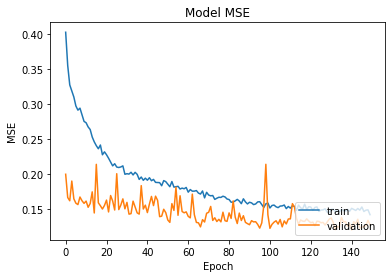

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
prediction = model.predict(x_test)
prediction = target_scaler.inverse_transform(prediction)
prediction = np.rint(prediction)

In [ ]:
print(prediction)

[[ 15.   3.   3.  17.  16.]
 [ 17.  -7. -17.  16.  16.]
 [ 15.  -8. -17.  16.  17.]
 ...
 [ 14.  -2.  -9.  16.  16.]
 [ 21.  -8. -16.  16.  16.]
 [ 16.  -7.  -6.  16.  17.]]


In [ ]:
# for i in range(len(y_test_scaled.iloc[:,0])):       #unscaling y_train back to original distributing
#   # print(i)
#   y_test_scaled.iloc[i,0] = ((y_test_scaled.iloc[i,0] + 1)*(maxtr-mintr))/2 + mintr


# for i in range(len(y_test_scaled.iloc[:,1])):
#   # print(i)
#   y_test_scaled.iloc[i,1] = ((y_test_scaled.iloc[i,1] + 1)*(maxtx-mintx))/2 + mintx   #

# for i in range(len(y_test_scaled.iloc[:,2])):
#   # print(i)
#   y_test_scaled.iloc[i,2] = ((y_test_scaled.iloc[i,2] + 1)*(maxty-minty))/2 + minty   #

In [ ]:
# y_test_scaled

In [ ]:
# prediction = model.predict(x_test)    #finding predictions on x_test

In [ ]:
# prediction

In [ ]:
# for i in range(len(prediction[:,0])):     #unscaling prediction back to original distribution
#   # print(i)
#   prediction[i,0] = ((prediction[i,0] + 1)*(maxtr-mintr))/2 + mintr


# for i in range(len(prediction[:,1])):
#   # print(i)
#   prediction[i,1] = ((prediction[i,1] + 1)*(maxtx-mintx))/2 + mintx   #

# for i in range(len(prediction[:,2])):
#   # print(i)
#   prediction[i,2] = ((prediction[i,2] + 1)*(maxty-minty))/2 + minty 

In [ ]:
# prediction

In [ ]:
# prediction_round = np.rint(prediction)

In [ ]:
# prediction_round

In [ ]:
# y_test_inv = target_scaler.inverse_transform(y_test)

In [ ]:
# prediction = model.predict(x_test)
# prediction = target_scaler.inverse_transform(prediction)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

In [ ]:
print(mse)
print(mae)

195.05251186950272
13.00851373182553


In [ ]:
model.save("0to1-model2")

INFO:tensorflow:Assets written to: 0to1-model2/assets


In [ ]:
model.save("0to1-model2.h5")

In [ ]:
prediction_round = np.rint(prediction)
print(prediction_round)

In [ ]:
np.savetxt('alexnet--1to1-rxy.csv', prediction_round, delimiter=",")

In [ ]:
y_test_inv

In [ ]:
np.savetxt('alexnet-truth--1to1-rxy.csv', y_test_scaled, delimiter=",")

In [ ]:
# b1 = y_test_inv[:,0]
# b2 = prediction_round[:,0]
# error_b = mean_absolute_error(b1, b2)
# print(error_b)

In [ ]:
# r1 = y_test_scaled.iloc[:,0]
# r2 = prediction_round[:,0]
# error_r = mean_absolute_error(r1, r2)
# print(error_r)

In [ ]:
# t1 = y_test_inv[:,2]
# t2 = prediction_round[:,2]
# error_t = mean_absolute_error(t1, t2)
# print(error_t)

In [ ]:
from keras.models import load_model

In [ ]:
reconstructed_model = load_model('0to1-model2')

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('img1259.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img= cv2.resize(img, dsize=(224,224), interpolation = cv2.INTER_CUBIC)
# plt.imshow(img)
img.shape

img = np.reshape(img, (1, 224, 224))
# img = np.expand_dims(img, axis = 0)
# img = np.expand_dims(img, axis = 3)
# img = np.reshape(128,128)
# img = img.astype('float32')
img = img/255
img = np.repeat(img[..., np.newaxis], 3, -1)
# plt.imshow(img.reshape(128,128), cmap = plt.cm.binary)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
img2 = cv2.imread('trial2_7.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2= cv2.resize(img2, dsize=(224,224), interpolation = cv2.INTER_CUBIC)
# plt.imshow(img)
img2.shape

img2 = np.reshape(img2, (1, 224, 224))
# img = np.expand_dims(img, axis = 0)
# img = np.expand_dims(img, axis = 3)
# img = np.reshape(128,128)
# img = img.astype('float32')
img2 = img2/255
img2 = np.repeat(img2[..., np.newaxis], 3, -1)
# plt.imshow(img.reshape(128,128), cmap = plt.cm.binary)

In [ ]:
img2.shape

(1, 224, 224, 3)

In [ ]:
predictionimg = reconstructed_model.predict(img2)
print(predictionimg)

[[0.33701262 0.2790821  0.4132681  0.06850087 0.53418946]]


In [ ]:
predictionimg = target_scaler.inverse_transform(predictionimg)
predictionimg = np.rint(predictionimg)

In [ ]:
print(predictionimg)

[[ 17. -11.  -3.  16.  17.]]


In [ ]:
targetimg = reconstructed_model.predict(img)
print(targetimg)

[[0.31561142 0.36477828 0.31439748 0.0121838  0.14697085]]


In [ ]:
targetimg = target_scaler.inverse_transform(targetimg)
targetimg = np.rint(targetimg)

In [ ]:
targetimg

array([[16., -6., -7., 16., 16.]], dtype=float32)

In [ ]:
targetac = [22, -8, 20, 16, 16]

In [ ]:
delta = targetimg - predictionimg

In [ ]:
print(delta)    # 

[[-3.  5. -4.  0. -1.]]


In [ ]:
15 0 0 16 16      17 -1 1 16 16     19 -3 2 16 16     21 -6 7 16 16   23 -7 16 16 16   22 -9 17 16 16   22 -8 20 16 16  23 -10 19 16 16   21 -7 21 16 17    22 -8 20 16 17

In [ ]:
20 24 18 19 15      21 17 21 19 16      22  9  20 18 16     21 4 21  18 16     23 0 19 18 16    24  -5 22 18 16   22 -7 25 16 16    21 -9  19 16 16   22 -7 20 16 16    21 -9 21 16 16    22 -8 20 16 16    

target =  22  -8 20 16 16.   